# E-Commerce Public Dataset Data Analysis
- **Name:** Halyusa Ard Wahyudi
- **Email:** halyusa@gmail.com
- **LinkedIn:** https://www.linkedin.com/in/halyusaard

## Defining Business Questions

1. Bagaimana tren penjualan bulanan dari e-commerce ini?
2. Produk apa yang paling banyak terjual?
3. Produk apa yang paling sedikit terjual?
4. Bagaimana distribusi tipe pembayaran dari pelanggan?
5. Bagaimana distribusi nilai review dari pelanggan?

- How is the sales trend of this e-commerce?
- What is the most selling products? 
- What is the least selling products?
- How is the customers' payment type distribution?
- How is the customers' review score distribution?

## Packages Import

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling 

### Gathering Data

- Gathering data dengan mengunggah setiap tabel yang ada pada dataset dan menggunakan method `head()` untuk mencari tahu isi dari setiap tabel, dan juga melihat korelasi antar tabel dalam dataset.

- Uploads all the necessary tables from the dataset using `head()` method to gain tables information and to find out each tables correlation.

In [3]:
customers_df = pd.read_csv("customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
geolocation_df = pd.read_csv("geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [5]:
items_df = pd.read_csv("order_items_dataset.csv")
items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
payments_df = pd.read_csv("order_payments_dataset.csv")
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
reviews_df = pd.read_csv("order_reviews_dataset.csv")
reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [8]:
orders_df = pd.read_csv("orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
category_translation_df = pd.read_csv("product_category_name_translation.csv")
category_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [10]:
products_df = pd.read_csv("products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [11]:
sellers_df = pd.read_csv("sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- telah didapatkan informasi data dari setiap tabel pada dataset e-commerce, dan korelasi yang bisa dibentuk antar tabel dengan melihat primary-key dan foreign-key.

- gained the informations from each data tables from the e-commerce dataset, and the correlations of each tables would have by looking at their primary and foreign-keys.

### Assesing Data

Assesing data menggunakan:
- method `info()` untuk melihat tipe data dan jumlah data pada setiap kolom yang ada pada setiap tabel,
- method `duplicated()` untuk mengecek duplikasi data,

Assesing data using:
- `info()` method to check the data types and each columns' number of data
- `duplicated()` method to check duplicated data

In [12]:
customers_df.info()
print("Jumlah duplikasi data: ", customers_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
Jumlah duplikasi data:  0


In [13]:
geolocation_df.info()
print("Jumlah duplikasi data: ", geolocation_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
Jumlah duplikasi data:  261831


In [14]:
geolocation_df.head(20)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
5,1012,-23.547762,-46.635361,são paulo,SP
6,1047,-23.546273,-46.641225,sao paulo,SP
7,1013,-23.546923,-46.634264,sao paulo,SP
8,1029,-23.543769,-46.634278,sao paulo,SP
9,1011,-23.547640,-46.636032,sao paulo,SP


- terdapat banyak duplikasi data pada tabel geolocations_df, data yang terduplikasi adalah data lokasi dari pelanggan, sehingga terdapat banyak kesamaan antar pelanggan.
- there is a lot of duplication in this geolocations_df table, but the duplications is the customers' location data, so it is possible that there are so many location similarities.

In [15]:
items_df.info()
print("Jumlah duplikasi data: ", items_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
Jumlah duplikasi data:  0


In [16]:
payments_df.info()
print("Jumlah duplikasi data: ", payments_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
Jumlah duplikasi data:  0


In [17]:
reviews_df.info()
print("Jumlah duplikasi data: ", reviews_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
Jumlah duplikasi data:  0


- terdapat perbedaan jumlah data pada dua kolom di tabel data `reviews_df`, yaitu pada kolom `review_comment_title` dan `review_comment_message`.

- there are two columns in `reviews_df` that have differences in data count, they are `review_comment_title` and `review_comment_message`.

In [18]:
orders_df.info()
print("Jumlah duplikasi data: ", orders_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
Jumlah duplikasi data:  0


1. terdapat perbedaan jumlah data pada tiga kolom di tabel data orders_df, yaitu kolom `order_approved_at`, `order_delivered_carrier_date`, dan `order_delivered_customer_date`. 
2. terdapat kesalahan jenis tipe data, yang seharusnya adalah bertipe `datetime` pada kolom-kolom ini: `order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`, `order_estimated_delivery_date`.


- there are three columns that have differences in data count, they are `order_approved_at`, `order_delivered_carrier_date`, and `order_delivered_customer_date`.
- there is a mistake in data type, which should be the type of `datetime` in these columns: `order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`, `order_estimated_delivery_date`.

In [19]:
products_df.info()
print("Jumlah duplikasi data: ", products_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
Jumlah duplikasi data:  0


In [20]:
sellers_df.info()
print("Jumlah duplikasi data: ", sellers_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
Jumlah duplikasi data:  0


**Insight:**
1. terdapat perbedaan jumlah data pada beberapa kolom yang ada di tabel `reviews_df` dan tabel `orders_df`
2. terdapat kesalahan tipe data pada beberapa kolom yang ada di tabel `orders_df` 
3. tabel `geolocations_df` memiliki duplikasi data, namun value yang memiliki duplikasi merupakan value dari kolom geolocation yang memang memiliki banyak kesamaan antar pelanggan.

- there are differences in the amount of data in some columns in the `reviews_df` table and the `orders_df` table,
- there are data type errors in some columns in the `orders_df` table,
- table `geolocations_df` has data duplication, but the value that has duplication is the value of the geolocation column which does have many similarities between customers.

### Cleaning Data 

- imputasi pada tabel `reviews_df` dengan nama default bertipe data string.

In [21]:
reviews_df['review_comment_title'] = reviews_df['review_comment_title'].astype(str)
reviews_df['review_comment_title'] = reviews_df['review_comment_title'].fillna("comment title")

reviews_df['review_comment_message'] = reviews_df['review_comment_message'].astype(str)
reviews_df['review_comment_message'] = reviews_df['review_comment_message'].fillna("no comment")

In [22]:
reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

- mengubah data type pada tabel `orders_df` dengan data type `datetime` 

In [23]:
datetime_columns = ["order_purchase_timestamp"
                    , "order_approved_at"
                    , "order_delivered_carrier_date"
                    , "order_delivered_customer_date"
                    , "order_estimated_delivery_date"] 

for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column], errors='coerce')

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


- mengisi `na` value dengan string default

In [24]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [25]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [26]:
datetime_columns = ["review_creation_date"
                    , "review_answer_timestamp"]

for column in datetime_columns:
    reviews_df[column] = pd.to_datetime(reviews_df[column])

In [27]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


**Insight:**
- kolom pada tabel data bernilai `na` atau tidak memiliki value telah diisi, sehingga tidak ada lagi `null value` pada setiap tabel data.
- kolom yang memiliki tipe data yang salah telah diganti dengan tipe data yang sesuai dengan nama kolom data.

## Exploratory Data Analysis (EDA)

### Explore 

In [28]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
agisse                1
vieiras               1
bertopolis            1
abadiania             1
xexeu                 1
Name: customer_id, Length: 4119, dtype: int64

In [29]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

melihat persebaran customer pada tabel `customers_df` berdasarkan city dan state:
- persebaran pelanggan terbanyak pada masing-masing City dan State, yaitu ada di Kota (City) `Sao Paulo` dan State `RP`.


find out the distribution of customers in the `customers_df` table by city and state:
- the largest distribution of customers in each City and State, is in `Sao Paulo` City and State `RP`.

In [30]:
items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


melihat rangkuman parameter statistik pada tabel items_df:
- berdasarkan deskripsi keseluruhan tabel, diperoleh informasi bahwa penjualan paling sedikit adalah `1` item dan terbanyak adalah `21` item, dengan harga terendah yaitu `0.85` dan tertinggi sebesar `6735`. Kemudian freight value atau biaya pengiriman terendah adalah `0` dan yang tertinggi adalah sebesar `409.68`.

summary of statistical parameters in the items_df table:
- based on the overall description of the table, we can see that the least sales is `1` item and the most is `21` items, with the lowest price is `0.85` and the highest price is `6735`. Then the lowest freight value or shipping cost is `0` and the highest is `409.68`.

In [31]:
payments_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

In [32]:
payments_df["payment_value"].min()

np.float64(0.0)

In [33]:
payments_df["payment_value"].max()

np.float64(13664.08)

hasil eksplorasi tabel payments_df: 
- tipe pembayaran terbanyak adalah menggunakan `credit_card`
- nilai pembayaran paling sedikit bernilai `0` dan terbanyak sebesar `13664.08`

payments_df table exploration results: 
- the most used payment type is `credit_card`.
- the least payment value is `0` and the most is `13664.08`.

In [34]:
reviews_df.groupby(by="review_score").review_id.nunique().sort_values(ascending=False)

review_score
5    56910
4    19007
1    11282
3     8097
2     3114
Name: review_id, dtype: int64

- review_score atau nilai review dengan jumlah terbanyak adalah review dengan nilai `5`, diikuti dengan review bernilai `4`, `1`, `3`, dan yang paling sedikit adalah `2`. 

- review_score with the highest number of reviews is `5`, followed by `4`, `1`, `3`, and the least is `2`. 

In [35]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

- nilai `na` yang ada pada kolom `order_approved_at`, `order_delivered_carrier_date`, dan `order_estimated_delivery_date` menunjukkan ada berapa banyak pesanan yang tidak terdata status pengirimannya:
1. ada 160 pesanan pada tahap approve
2. ada 1783 pesanan pada tahap penyampaian ke carrier 
3. ada 2965 pesanan pada tahap penyampaian ke customer

- The `na` values in the `order_approved_at`, `order_delivered_carrier_date`, and `order_estimated_delivery_date` columns indicate how many orders have no delivery status recorded:
1. there are 160 orders at the approve stage
2. there are 1783 orders at the stage of submission to the carrier 
3. there are 2965 orders at the stage of delivery to the customer

In [36]:
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)

orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [37]:
orders_customers_df.groupby(by="customer_city").order_id.count().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
agisse                1
vieiras               1
bertopolis            1
abadiania             1
xexeu                 1
Name: order_id, Length: 4119, dtype: int64

In [38]:
orders_customers_df.groupby(by="customer_state").order_id.count().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: order_id, dtype: int64

- hasil perhitungan persebaran pemesanan berdasarkan `order_id` menghasilkan output yang sama dengan perhitungan persebaran berdasarkan `customer_id` pada tabel `customers_df` karena `customer_id` merupakan data unik, sama dengan `order_id`.

- the results of the order distribution calculation based on `order_id` produce the same output as the distribution calculation based on `customer_id` in the `customers_df` table because `customer_id` is unique data, the same as `order_id`.

In [39]:
orders_customers_df.groupby(by="order_status").customer_id.nunique().sort_values(ascending=False)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: customer_id, dtype: int64

- berdasarkan tabel di atas, bisa dilihat informasi status order dari setiap customer. order atau pesanan paling banyak telah terselesaikan, yang memiliki status `delivered`, dan paling sedikit adalah pesanan yang terhenti pada tahap `approved`.

- Based on the table above, we can see the order status information of each customer. The most orders have been completed, which have a status of `delivered`, and the least are orders that are stalled at the `approved` stage.

In [40]:
products_english_df = pd.merge(
    left=products_df,
    right=category_translation_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)

products_english_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


- menggabungkan tabel `products_df` dengan tabel `category_translation_english_df` untuk mendapatkan nama produk dalam Bahasa Inggris agar mempermudah analisis lanjutan. 

- merge the `products_df` table with the `category_translation_english_df` table to get the product names in English to make further analysis easier. 

In [41]:
products_sales_df = pd.merge(
    left=products_english_df,
    right=items_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)

products_sales_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29


In [42]:
products_sales_df.groupby(by="product_category_name_english").order_id.count().sort_values(ascending=False)

product_category_name_english
bed_bath_table               11115
health_beauty                 9670
sports_leisure                8641
furniture_decor               8334
computers_accessories         7827
                             ...  
arts_and_craftmanship           24
la_cuisine                      14
cds_dvds_musicals               14
fashion_childrens_clothes        8
security_and_services            2
Name: order_id, Length: 71, dtype: int64

1. berdasarkan informasi dari tabel penjualan berdasarkan kategori produk, bisa diketahui `bed_bath_table` dan `health_beauty` merupakan dua produk dengan jumlah produk terjual paling banyak. 
2. dapat diketahui juga dua produk dengan jumlah produk terjual paling sedikit adalah `fashion_childrens_clothes` dan `security_and_services`. 

- Based on the information from the sales table by product category, it can be seen that `bed_bath_table` and `health_beauty` are the two products with the most number of products sold. 
- It can also be seen that the two products with the least number of products sold are `fashion_childrens_clothes` and `security_and_services`. 

In [43]:
products_sales_df.groupby(by="product_category_name_english").price.max().sort_values(ascending=False).head(3)

product_category_name_english
housewares    6735.0
computers     6729.0
art           6499.0
Name: price, dtype: float64

In [44]:
products_sales_df.groupby(by="product_category_name_english").price.min().sort_values(ascending=False).tail(3)

product_category_name_english
stationery                         2.29
health_beauty                      1.20
construction_tools_construction    0.85
Name: price, dtype: float64

- 2 tabel di atas menunjukkan:
1. Tiga produk dengan harga tertinggi, yaitu `housewares`, `computers`, dan `art`
2. Tiga produk dengan harga terendah, yaitu `stationery`, `health_beauty`, dan `construction_tools_construction`.

- The 2 tables above show:
1. The three products with the highest prices are `housewares`, `computers`, and `art`.
2. The three lowest priced products are `stationery`, `health_beauty`, and `construction_tools_construction`.

In [45]:
sellers_df.groupby(by="seller_city").seller_id.count().sort_values(ascending=False).head(3)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
Name: seller_id, dtype: int64

In [46]:
sellers_df.groupby(by="seller_city").seller_id.count().sort_values(ascending=False).tail(3)

seller_city
angra dos reis rj         1
vitoria de santo antao    1
vicente de carvalho       1
Name: seller_id, dtype: int64

1. dari tabel persebaran seller berdasarkan kota di atas, didapatkan informasi bahwa lokasi seller terbanyak adalah pada kota `sao paulo` dan kota dengan seller terbanyak kedua adalah `curitiba`
2. dan kota dengan jumlah seller paling sedikit adalah berjumlah 1 yang terletak pada beberapa kota, salah satunya adalah kota `vicente de carvalho`

- from the seller distribution table based on the city above, we get the information that the city with the most sellers located is `sao paulo` and the city with the second most sellers is `curitiba`.
- and the city with the least number of sellers is 1 which is located in several cities, one of which is the city of `vicente de carvalho`.

In [47]:
sellers_df.groupby(by="seller_state").seller_id.count().sort_values(ascending=False).head(3)

seller_state
SP    1849
PR     349
MG     244
Name: seller_id, dtype: int64

In [48]:
sellers_df.groupby(by="seller_state").seller_id.count().sort_values(ascending=False).tail(3)

seller_state
PI    1
MA    1
PA    1
Name: seller_id, dtype: int64

1. dari tabel persebaran seller berdasarkan state di atas, didapatkan informasi bahwa lokasi seller terbanyak adalah pada state `SP` dan state dengan seller terbanyak kedua adalah `PR`
2. dan state dengan jumlah seller paling sedikit adalah berjumlah 1 yang terletak pada beberapa state, salah satunya adalah state `PA`

- from the seller distribution table based on state above, we het that the state with the most seller is `SP` and the state with second most state located is `PR`
- state with the least number of seller is 1 which is located in several states, one of which is the state of `PA`.

In [50]:
data_df = pd.merge(
    left=orders_customers_df,
    right=products_sales_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113425 entries, 0 to 113424
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113425 non-null  object        
 1   customer_id                    113425 non-null  object        
 2   order_status                   113425 non-null  object        
 3   order_purchase_timestamp       113425 non-null  datetime64[ns]
 4   order_approved_at              113264 non-null  datetime64[ns]
 5   order_delivered_carrier_date   111457 non-null  datetime64[ns]
 6   order_delivered_customer_date  110196 non-null  datetime64[ns]
 7   order_estimated_delivery_date  113425 non-null  datetime64[ns]
 8   customer_unique_id             113425 non-null  object        
 9   customer_zip_code_prefix       113425 non-null  int64         
 10  customer_city                  113425 non-null  object        
 11  

## Visualization & Explanatory Analysis 

### Bagaimana tren penjualan bulananan e-commerce ini? 

### How is the sales trend of this e-commerce?

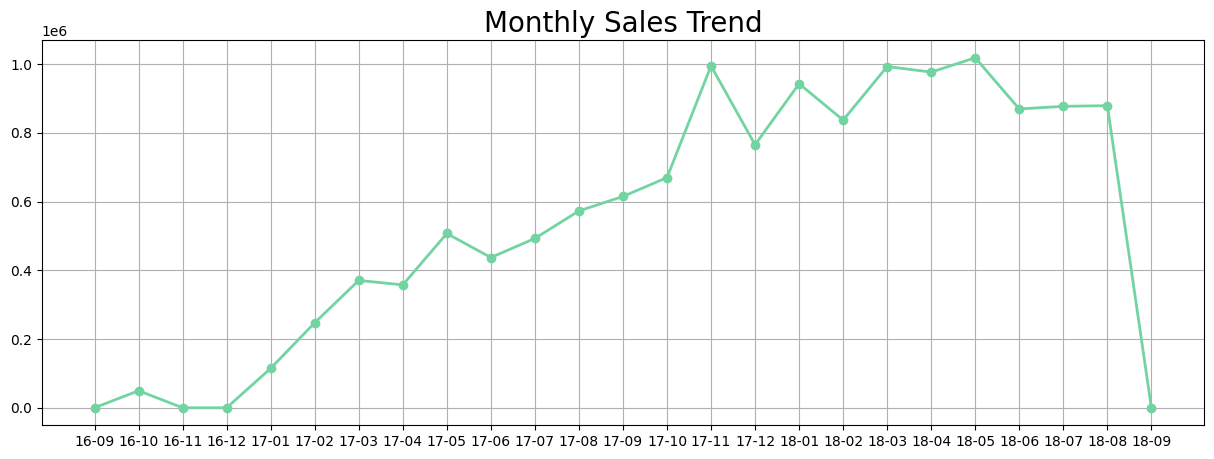

In [62]:
monthly_sales_df = data_df.resample(rule='ME', on='order_approved_at').agg({
    "order_id": "nunique",
    "price": "sum"
})

monthly_sales_df.index = monthly_sales_df.index.strftime('%y-%m')
monthly_sales_df = monthly_sales_df.reset_index()
monthly_sales_df.rename(columns={
    "order_id": "order_count",
    "price": "sales_trend" 
}, inplace=True),

plt.figure(figsize=(15, 5))
plt.plot(monthly_sales_df["order_approved_at"], monthly_sales_df["sales_trend"], marker='o', linewidth=2, color="#72d4a1")
plt.title("Monthly Sales Trend", loc="center", fontsize=20)
plt.grid()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

- Dari lineplot di atas, bisa dilihat bahwa tren penjualan dari e-commerce ini mulai meningkat sejak bulan 12 tahun 2016, hingga mencapai angka penjualan sebesar 1 juta pada bulan 11 tahun 2017. Angka tersebut sempat fluktuatif pada beberapa bulan berikutnya, dan mencapai puncaknya dengan angka lebih dari 1 juta pada bulan 5 tahun 2018, mengalami penurunan setelahnya, dan diakhiri dengan anjlok hingga 0 penjualan pada bulan 9 tahun 2018.

- From the lineplot above, it can be seen that the sales trend of this e-commerce started to increase since month 12 of 2016, until it reached 1 million sales in month 11 of 2017. The number fluctuated in the following months, and reached a peak of more than 1 million in month 5 of 2018, experienced a decline afterwards, and ended with a drop to 0 sales in month 9 of 2018.

### Produk apa yang paling banyak dan paling sedikit terjual? 

### What is the most selling products?

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9520\1154279422.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_id", y="product_category_name_english", data=items_sales_df.head(5), palette=colors, ax=ax[0])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9520\1154279422.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_id", y="product_category_name_english", data=items_sales_df.sort_values(by="order_id", ascending=True).head(5), palette=colors, ax=ax[1])


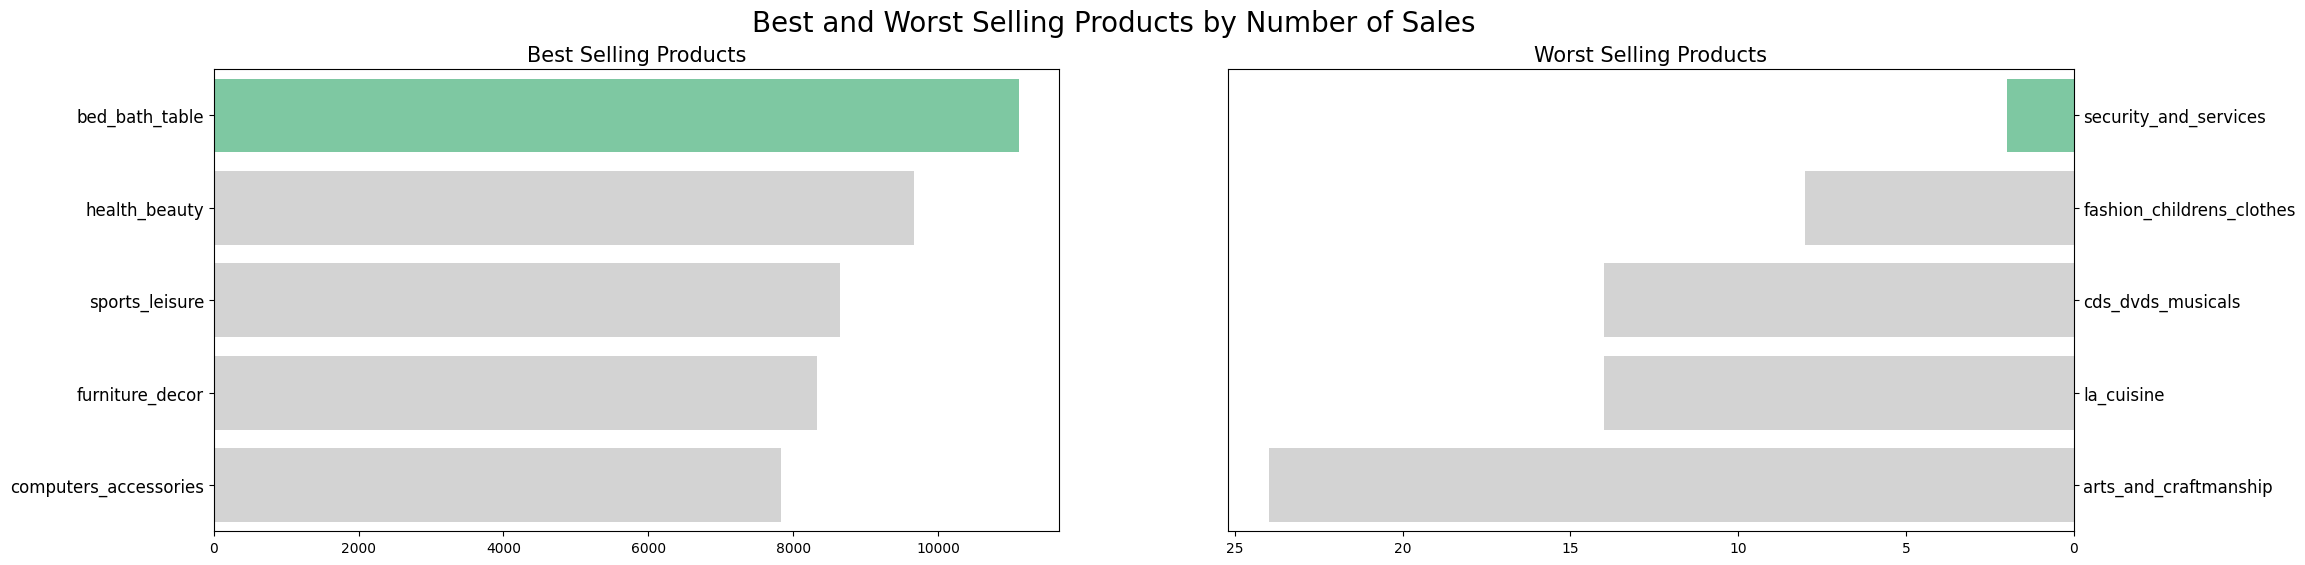

In [82]:
items_sales_df = products_sales_df.groupby(by="product_category_name_english").order_id.count().sort_values(ascending=False).reset_index()

colors = ["#72D4A1", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

sns.barplot(x="order_id", y="product_category_name_english", data=items_sales_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Selling Products", loc="center", fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)

sns.barplot(x="order_id", y="product_category_name_english", data=items_sales_df.sort_values(by="order_id", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Selling Products", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Selling Products by Number of Sales", fontsize=20)
plt.show()


1. Produk yang terjual paling banyak dengan angka penjualan lebih dari 10000 adalah bed_bath_table. 4 produk dengan penjualan terbanyak lainnya memiliki angka di bawah 10000.
2. Sedangkan produk yang terjual paling sedikit adalah security_and_services dengan hanya angka di bawah 5.

- Product with the most sales is `bed_bath_table` with more than 10000 sold. and the other 4 products with the highest sales number is below 10000 sales.
- Product with the least sales is `security_and_services` with just below 5 sales.

### Bagaimana distribusi tipe pembayaran yang dilakukan customer? 

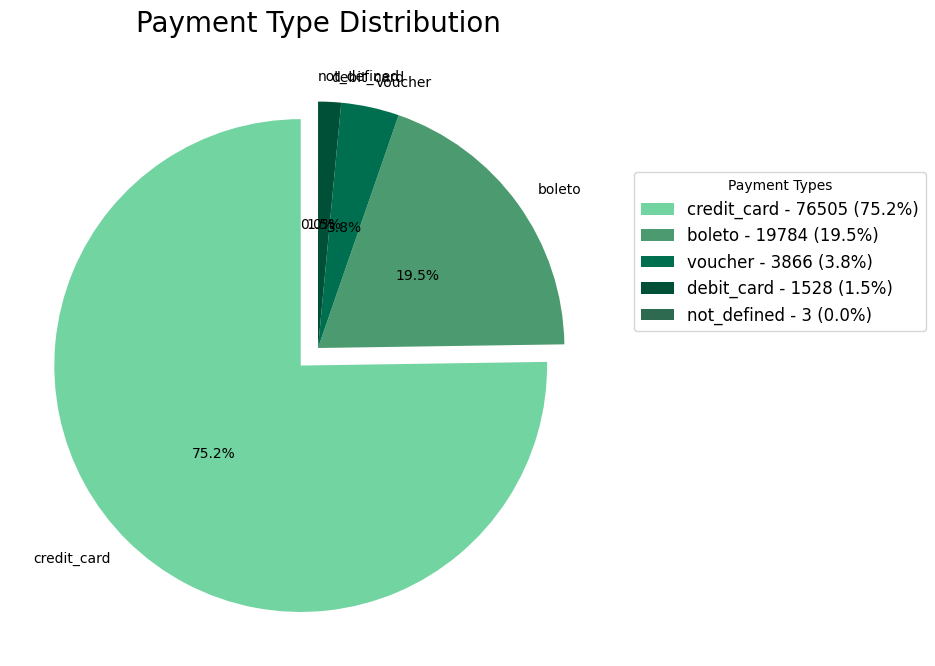

In [118]:
payment_types_df = payments_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

labels = payment_types_df.index
sizes = payment_types_df.values
colors = ['#72D4A1', '#4C9A6F', '#006F4F', '#004F37', '#2D6A4F']
explode = [0.1 if i == 0 else 0 for i in range(len(labels))]
labels_with_values = [f"{label} - {size} ({pct}%)" for label, size, pct in zip(labels, sizes, [f'{(size/sum(sizes))*100:.1f}' for size in sizes])]

plt.figure(figsize=(8,8))
plt.pie(
    sizes, 
    labels=labels, 
    colors=colors, 
    explode=explode, 
    autopct='%1.1f%%', 
    startangle=90,
    textprops={'fontsize': 10},
    pctdistance=0.5
    )

plt.legend(
    labels_with_values, 
    title="Payment Types", 
    loc="upper right", 
    bbox_to_anchor=(1.5, 0.8),
    fontsize=12  # Menentukan ukuran font pada legend
)

plt.title("Payment Type Distribution", fontsize=20)

plt.show()

**Insight:**
- Ada 5 tipe pembayaran yang digunakan oleh pelanggan e-commerce ini, yang paling banyak digunakan adalah credit_card, sebanyak 75.2% dari seluruh transaksi pelanggan.

- There are 5 payment types that used by the customer, the most used one is `credit_card` which is 75.2% of all transactions.

### Bagaimana distribusi nilai review dari pelanggan?

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9520\132978082.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


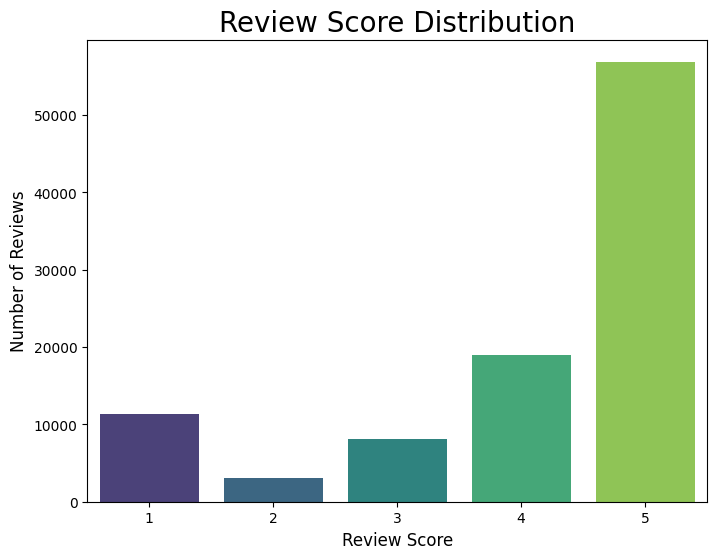

In [104]:
review_distribution_df = reviews_df.groupby(by="review_score").review_id.nunique().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(
    x=review_distribution_df.index,
    y=review_distribution_df.values,
    palette='viridis')

plt.title("Review Score Distribution", fontsize=20)
plt.xlabel("Review Score", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)

plt.show()

- Review Score terbanyak yang diberikan oleh pelanggan adalah 5, dengan jumlah lebih dari 50000 pelanggan, dan yang paling sedikit dipilih adalah 2.

- The highest number of review score that given by the customer is 5 with more than 50000 customers, and the least choosen by the customers is 2.